In [1]:
# Set up Environment
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score, classification_report, precision_recall_curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing DataFrame
df = pd.read_csv("/home/achoo/Desktop/Honeypot/Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
# Show DataFram
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [4]:
#Removing specific rows from Data
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)
#Check for missig sum
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [5]:
#Exclude colums with data tyoes that aren't numbers
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [6]:
# Replace all values in 'attack' column that are not 'normal' with 'attack'
df['attack'].loc[df['attack']!='normal']='attack'

# Initialize a LabelEncoder to encode categorical columns
le=LabelEncoder()

In [7]:
# Encode the columns (convert categorical data to numeric)
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

In [8]:
# Separate features (X) and labels (y)
X=df.drop(['attack'],axis=1)
y=df['attack']

# Initialize StandardScaler to scale feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_transformed = scaler.transform(X)

# Split data to train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
###Using Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Predicttions on validation set
rf_pred=rf.predict(X_val)

#Create DataFrame for predictions
rf_df = pd.DataFrame()
rf_df['actual'] = y_val
rf_df['pred'] = rf_pred
rf_df.head()

,actual,pred
86055,0,0
99184,1,1
76275,1,1
105488,0,0
26572,0,0


In [10]:
#Print Evaluation
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_val, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))

Random Forest Confusion Matrix:
 [[11726     0]
 [    3 13466]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



In [11]:
# Train usinng XGBoostModel
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [12]:
# Predictions on validation set
y_val_pred = xgb.predict(X_val)

# Print evaluation metrics
print("XGBoost Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix:
 [[11726     0]
 [    5 13464]]


In [13]:
###COMBINED MODELS###

#Create a VotingClassifier with the defined models
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb)
], voting='hard')

In [14]:
# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred_voting = voting_clf.predict(X_val)

In [15]:
# Print evaluation metrics for the voting classifier
print("Voting Classifier Validation Classification Report:\n", classification_report(y_val, y_val_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_voting))

Voting Classifier Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix:
 [[11726     0]
 [    6 13463]]


In [16]:
### TESTING SET ###
test_df = pd.read_csv("/home/achoo/Desktop/Honeypot/Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
test_df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [17]:
#Removing specific rows from Data
test_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

# Replace all values in 'attack' column that are not 'normal' with 'attack'
test_df['attack'].loc[test_df['attack']!='normal']='attack'

#Exclude colums with data tyoes that aren't numbers
test_df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,private,REJ,attack
1,tcp,private,REJ,attack
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,attack
4,tcp,telnet,RSTO,attack
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,attack
22542,udp,domain_u,SF,normal


In [18]:
# Encode the columns (convert categorical data to numeric)
test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])
test_df['attack']=le.fit_transform(test_df['attack'])

In [19]:
# Separate features (X) and labels (y)
X_test = test_df.drop(['attack'], axis=1)
y_test = test_df['attack']

# Scale the test features
X_test_scaled = scaler.transform(X_test)

In [20]:
###Using Random Forest on Test Data
#X_test_transformed = scaler.transform(X_test)
test_pred = rf.predict(X_test_scaled)

rf_test_df = pd.DataFrame()
rf_test_df['actual'] = y_test
rf_test_df['pred'] = test_pred
rf_test_df.head()

,actual,pred
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [21]:
# Print evaluation metrics for Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.82     12833
           1       0.71      0.97      0.82      9711

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544

Confusion Matrix:
 [[9026 3807]
 [ 266 9445]]


In [22]:
# Initialize and fit LOF
lof = LocalOutlierFactor()
y_test_pred_lof = lof.fit_predict(X_test_scaled)
y_test_pred_lof_binary = [0 if x == 1 else 1 for x in y_test_pred_lof]

In [23]:
# Print test evaluation metrics
y_test_pred = xgb.predict(X_test_scaled)
print("XGBoost Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

XGBoost Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.84     12833
           1       0.74      0.97      0.84      9711

    accuracy                           0.84     22544
   macro avg       0.86      0.86      0.84     22544
weighted avg       0.87      0.84      0.84     22544

Confusion Matrix:
 [[9567 3266]
 [ 285 9426]]


In [24]:
###COMBINED MODELS###
# Predictions on the test set
y_test_pred = voting_clf.predict(X_test_scaled)

In [25]:
# Evaluation on the test set
print("Voting Classifier Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Voting Classifier Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86     12833
           1       0.76      0.97      0.85      9711

    accuracy                           0.85     22544
   macro avg       0.86      0.87      0.85     22544
weighted avg       0.88      0.85      0.85     22544

Confusion Matrix:
 [[9820 3013]
 [ 287 9424]]


In [26]:
####PLOTTING GRAPH#####
# Define and train the models
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Create the Voting Classifier using soft voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb_model)],
    voting='soft'  # Use soft voting to enable predict_proba
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [27]:
# Get predicted probabilities
rf_pred_proba = rf.predict_proba(X_test)[:, 1]
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
voting_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve for each model
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred_proba)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_pred_proba)
precision_voting, recall_voting, _ = precision_recall_curve(y_test, voting_pred_proba)

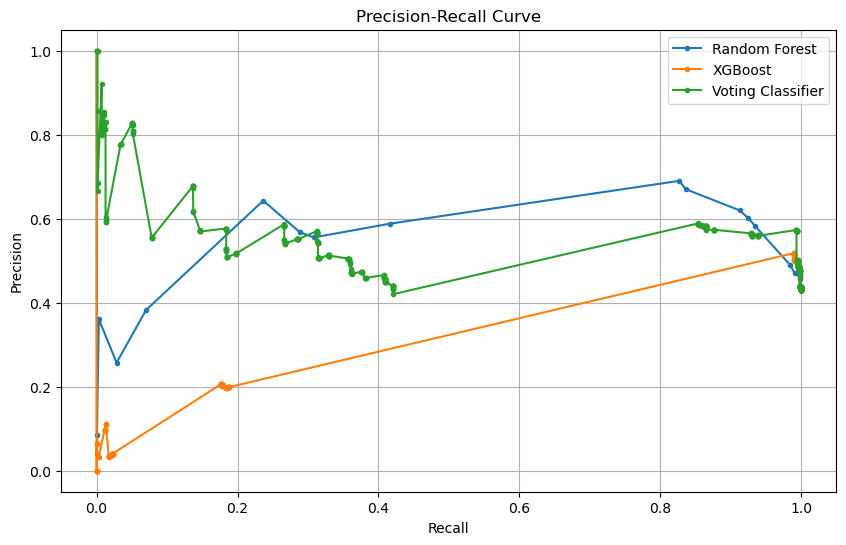

In [28]:
# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
plt.plot(recall_voting, precision_voting, marker='.', label='Voting Classifier')


# Adding labels and title
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

In [29]:
# Calculate ROC curve for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_pred_proba)

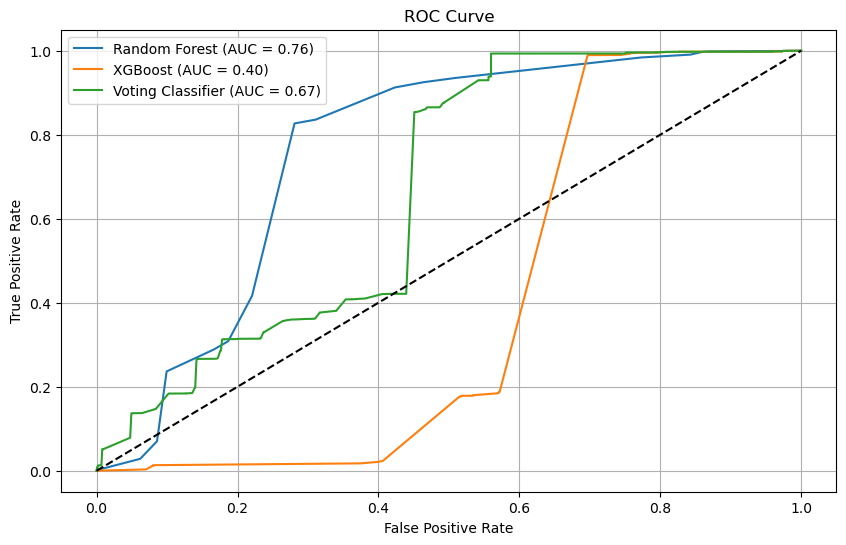

In [31]:
# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc(fpr_xgb, tpr_xgb)))
plt.plot(fpr_voting, tpr_voting, label='Voting Classifier (AUC = {:.2f})'.format(auc(fpr_voting, tpr_voting)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [32]:
# Calculate AUC for each model
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_voting = auc(fpr_voting, tpr_voting)

print(f"AUC for Random Forest: {roc_auc_rf:.2f}")
print(f"AUC for XGBoost: {roc_auc_xgb:.2f}")
print(f"AUC for Voting Classifier: {roc_auc_voting:.2f}")

AUC for Random Forest: 0.76
AUC for XGBoost: 0.40
AUC for Voting Classifier: 0.67
